# 把学生的记录分成两列

创建文件夹,第一遍会创建对应的文件夹，后面在次执行会报错，请忽略错误

## 请同学们一定按规范命名，下面的path="0000_shi_hailong"，把000换成老师分给你们的编号，后面改成自己的名字

In [43]:
import os
path="0000_shi_hailong"
os.mkdir(path) #第一次执行时创建文件夹，再次执行会报错，可以忽略

先定义filename做为要解析的文件的名字

In [44]:
filename = "2020-12-21.csv"

先复制一份考勤记录到自己创建的文件夹下面,并且为复制的文件起一个新名字

In [48]:
new_name = "my_record.csv" #my_record这几个字母可以改成自己想要的名字

In [49]:
import shutil
shutil.copy(filename,path + "/" + new_name)

'0000_shi_hailong/my_record.csv'

后面就调用自己复制的这份文件了

In [55]:
my_file = path + "/" + new_name

要创建csv文件用来存储解析的结果，要引用csv相关的方法，所以我们先import

In [51]:
import csv

创建文件对象f0

In [52]:
f0 = open(path + "/" + "split.csv",'w',encoding='utf-8')

根据文件对象构建csv写入对象csv_writer

In [53]:
csv_writer = csv.writer(f0)

读取学生刷脸签到的记录，把字符串中的姓名和时间分开为两列，再存入result1.csv文件中

创建要读取的文件对象，并一次性读取完，存入myDataList中

In [56]:
f = open(my_file,'r+',encoding='utf-8')
myDataList = f.readlines()

In [57]:
for line in myDataList:
    #print(line)
    entry = line.split(',')
    csv_writer.writerow(entry)

关闭文件对象f0，如果不关闭，可能会丢失数据

In [58]:
f0.close()
f.close()

# 按名字筛选学生

先定义学生的名字student_name，筛选后存储文件的名字name_file

In [67]:
student_name = "LIYUSHAN"
name_file = student_name + ".csv"

和上面一样，先创建文件对象，再创建文件写入对象

In [68]:
f0 = open(path + "/" + name_file,'w',encoding='utf-8')
csv_writer = csv.writer(f0)

和上面的一样，读取文件

In [69]:
f = open(my_file,'r+',encoding='utf-8')
myDataList = f.readlines()
for line in myDataList:
    entry = line.split(',')
    if len(entry) == 2:
        if entry[0] == student_name:
            csv_writer.writerow(entry)

In [70]:
f0.close()
f.close()

# 按某一时间段筛选

请填写标准格式,修改时间段的开始时间和结束时间时，只需要修改单引号里面的数字，不要修改冒号或添加其他符号

可以修改要保存的时间段的文件名字time_file,注意，只能修改单引号里面的圆点前面的字母

In [73]:
start_time= '17:30:00'
end_time = '18:30:00'
time_file ='your_time_student.csv'

创建要保存的文件的对象f0和写入对象csv_writer

In [74]:
f0 = open(path + "/" + time_file,'w',encoding='utf-8')
csv_writer = csv.writer(f0)

创建要读取的文件对象，并把数据读取后存放的myDataList中

In [75]:
f = open(my_file,'r+',encoding='utf-8')
myDataList = f.readlines()

逐行解析判断，把该时间段内的学生存入新的文件

In [76]:
for line in myDataList:
    entry = line.split(',')
    if len(entry) == 2:
        if entry[1] >= start_time and entry[1] <= end_time:
            csv_writer.writerow(entry)

记得关闭文件对象

In [77]:
f0.close()
f.close()

# 根据时段区间和学生名字选择学生数据

In [78]:
students =['LIUZIQI','SHITIANRUI']

In [79]:
start_time= '17:30:00'
end_time = '18:30:00'
time_file ='time_name.csv'

In [80]:
f0 = open(path + "/" + time_file,'w',encoding='utf-8')
csv_writer = csv.writer(f0)

In [81]:
f = open(my_file,'r+',encoding='utf-8')
myDataList = f.readlines()

In [82]:
for line in myDataList:
    entry = line.split(',')
    if len(entry) == 2:
        if entry[1] >= start_time and entry[1] <= end_time:
            for item in students:
                if entry[0] == item:
                    csv_writer.writerow(entry)

In [83]:
f0.close()
f.close()

# 统计学生出现的次数

前面已经用过的语句和概念，这里就不再解释了

先定义一个字典用来存储学生的信息

In [86]:
dict = {}

用来存储统计信息的文件

In [87]:
count_file = 'count_stuent.csv'
f0 = open(path + "/" + count_file,'w',encoding='utf-8')
csv_writer = csv.writer(f0)

读取待统计文件

In [88]:
f = open(my_file,'r+',encoding='utf-8')
myDataList = f.readlines()

利用python的字典存储统计信息

In [89]:
for line in myDataList:
    entry = line.split(',')
    if entry[0] in dict:
        dict[entry[0]] = int(dict[entry[0]]) + 1
    else:
        dict[entry[0]] = 1

将字典中的数据存入统计文件中

In [90]:
for item in dict:
    csv_writer.writerow([item,dict[item]])

关闭文件对象

In [91]:
f.close()
f0.close()

# 把学生的数据画成柱状图

引入相关的库

In [92]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
count_file = 'count_stuent.csv'
f = open(path + "/" + count_file,'r+',encoding='utf-8')
myDataList = f.readlines()

In [94]:
names = []
names_num = []
idx = 1
times = []

In [95]:
for line in myDataList:
    entry = line.split(',')
    if len(entry) == 2:
        names.append(entry[0])
        times.append(int(entry[1]))
        names_num.append(idx)
        idx += 1

No handles with labels found to put in legend.


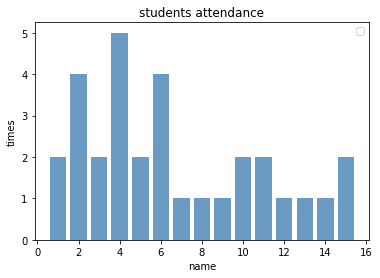

1 "
2 LIYUSHAN
3 WENGSINAN
4 ZHOUTIANTONG
5 LIUZIQI
6 SHITIANRUI
7 LIU0XIANG
8 QIWEI
9 WANGYIJIN
10 LIANGXINYU
11 MAOYUFANG
12 WANGYIHAN
13 LOULAN
14 ELON-MUSK
15 BILL-GATES


In [97]:
# 绘图
plt.bar(x=names_num, height=times, color='steelblue', alpha=0.8)
# 设置标题
plt.title("students attendance")
# 为两条坐标轴设置名称
plt.xlabel("name")
plt.ylabel("times")

plt.legend()
plt.show()
for item in names_num:
    print(item,names[item-1])